In [1]:
from sklearn.preprocessing import StandardScaler
import keras
import talib
import numpy as np
import pandas as pd
import talib
import numpy as np
import pandas as pd
import tqdm
import Finlab.utility as fl
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

# Built Futures
### Williams %R,RSI,WMA,EMA,SMA,Triple EMA,CCI,CMO,ADX,PPO,DX,ADOSC,STOCH,MACD,ATR

In [2]:
df=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/RM_Price/rawMaterialPrice.pickle')
twii=df.loc['cmeSoybeans'].loc['1961-08-10':]
twiiClose=twii['Close']

TR=range(6,120,12)
s1=pd.DataFrame({'WILLR_'+str(time):talib.WILLR(twii['High'],twii['Low'], twii['Close'], timeperiod=time) for time in TR})
s2=pd.DataFrame({'RSI_'+str(time):talib.RSI(twii['Close'], timeperiod=time) for time in TR})
s3=pd.DataFrame({'WMA_'+str(time):twii['Close']/talib.WMA(twii['Close'], timeperiod=time) for time in TR})
s4=pd.DataFrame({'EMA_'+str(time):twii['Close']/talib.EMA(twii['Close'], timeperiod=time) for time in TR})
s5=pd.DataFrame({'SMA_'+str(time):twii['Close']/talib.SMA(twii['Close'], timeperiod=time) for time in TR})
s6=pd.DataFrame({'TRIMA_'+str(time):twii['Close']/talib.TRIMA(twii['Close'], timeperiod=time) for time in TR})
s7=pd.DataFrame({'CCI_'+str(time):talib.CCI(twii['High'],twii['Low'], twii['Close'], timeperiod=time) for time in TR})
s8=pd.DataFrame({'CMO_'+str(time):talib.CMO(twii['Close'], timeperiod=time) for time in TR})
s9=pd.DataFrame({'ADX_'+str(time):talib.ADX(twii['High'],twii['Low'], twii['Close'], timeperiod=time) for time in TR})
s10=pd.DataFrame({'PPO_'+str(time):talib.PPO(twii['Close'], fastperiod=time, slowperiod=(time*2)) for time in TR})
s11=pd.DataFrame({'DX_'+str(time):talib.DX(twii['High'],twii['Low'],twii['Close'], timeperiod=time) for time in TR})
s12=pd.DataFrame({'ADOSC_'+str(time):talib.ADOSC(twii['High'],twii['Low'],twii['Close'],twii['Volume'],fastperiod=time, slowperiod=(time*2)) for time in TR})
ss=pd.DataFrame({'STOCH_'+str(time):talib.STOCH(twii['High'],twii['Low'],twii['Close'],fastk_period=(time*2),slowk_period=time,slowd_period=time) for time in TR})
s13=pd.DataFrame({name: ss.iloc[0,n]-ss.iloc[1,n] for n,name in zip(range(len(ss.iloc[0])),ss.columns)})

ss2=pd.DataFrame({'MACD_'+str(time):talib.MACD(twii['Close'],fastperiod=time, slowperiod=time*2, signalperiod=time*0.8) for time in TR})
s14=pd.DataFrame({name: ss2.iloc[2,n] for n,name in zip(range(len(ss2.iloc[0])),ss2.columns)})
s15=pd.DataFrame({'ATR_'+str(time):talib.ATR(twii['High'],twii['Low'], twii['Close'], timeperiod=time) for time in TR})

features=pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15],axis=1)
# features=features.dropna()
features

,WILLR_6,WILLR_18,WILLR_30,WILLR_42,WILLR_54,WILLR_66,WILLR_78,WILLR_90,WILLR_102,WILLR_114,...,ATR_6,ATR_18,ATR_30,ATR_42,ATR_54,ATR_66,ATR_78,ATR_90,ATR_102,ATR_114
Date,,,,,,,,,,,,,,,,,,,,,
1961-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-17,-47.826418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-18,-26.087335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.866667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-21,-38.235476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.805556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-22,-1.666500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.154630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Built labels

In [3]:
from Finlab import labels 

# # continuous trading signal
# label = labels.continuous_trading_signal(twii['Close'], 30)

# fixed time horizon
# label = labels.fixed_time_horizon(twii['Close'], 30)

# trade point decision
# label = labels.trade_point_dicision(twii['Close'], 30)

# # triple barrier
label = labels.triple_barrier(twii['Close'],1.06, 0.97, 20).triple_barrier_signal == 1
# label[label['triple_barrier_signal']==1]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


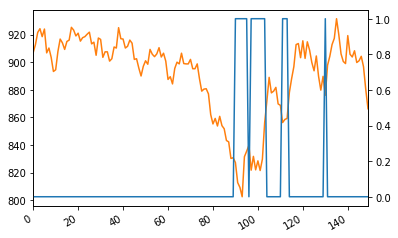

In [4]:
label['2019'].astype(int).plot(secondary_y=True, use_index=False)
twii['Close']['2019'].plot(use_index=False)


# Visualize

In [5]:
def calculate_3d_feature(x, y_, n):

    assert len(x) == len(y_)
    
    X = []
    y = []
    indexes = []

    for i in tqdm.tqdm_notebook(range(0, len(x)-n)):
        X.append(x.iloc[i:i+n].values)
        y.append(y_.iloc[i+n-1])
        indexes.append(x.index[i+n-1])

    X = np.array(X)
    y = np.array(y)
    indexes = np.array(indexes)
    return X, y, indexes

In [6]:
import numpy as np
ss, features_scaled = fl.scale(features)
features_scaled_dropna, label_dropna = fl.dropna(features_scaled, label)

train_s = None
train_e ='2010'

x = features_scaled_dropna[train_s:train_e]
y = label_dropna[train_s:train_e] == 1
n=len(features.columns)
pic=calculate_3d_feature(x, y, n)

Text(0.5, 1.0, 'Hold:0')

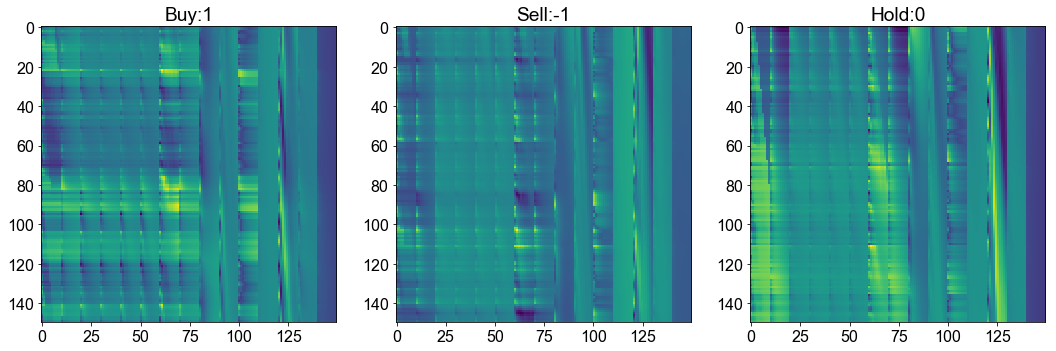

In [7]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams['font.family']=['Arial Unicode MS']
plt.rcParams['figure.figsize'] = (18, 18)
plt.rcParams['font.size']=16

plt.subplot(1,3,1)
plt.title('Buy:1')
plt.imshow(pic[0][0])
plt.subplot(1,3,2)
plt.imshow(pic[0][900])
plt.title('Sell:-1')
plt.subplot(1,3,3)
plt.imshow(pic[0][1600])
plt.title('Hold:0')



In [8]:
import numpy as np
ss, features_scaled = fl.scale(features)
features_scaled_dropna, label_dropna = fl.dropna(features_scaled, label)

train_s = None
train_e ='2014'

x = features_scaled_dropna[train_s:train_e]
y = label_dropna[train_s:train_e]==1

#########
#  CNN  #
#########

model = fl.cnn_classifier_fit(x, y,len(features.columns))
ey = fl.predict_3d_feature(model, features_scaled_dropna)
ey
##########
#  LSTM  #
##########

# model = fl.lstm_classifier_fit(x, y,len(features.columns))
# ey = fl.predict_3d_feature(model, features_scaled_dropna)

########
#  NN  #
########

# model = fl.neural_network_classifier_fit(x, y)
# ey = fl.predict_feature(model, features_scaled_dropna)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 136, 15)           33765     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 15)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 15)            3390      
_________________________________________________________________
flatten_1 (Flatten)          (None, 195)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               23520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                9680      
_________

KeyboardInterrupt: 

In [ ]:
returns = (twii['Close'].shift(-1)/twii['Close'])[ey.index & twii['Close'].index]
signal = (ey > ey.quantile(0.5)).rolling(1).sum() > 0
# returns[signal]['2014':].cumprod().plot()
# returns['2014':].cumprod().plot()

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['font.family']=['Arial Unicode MS']
plt.rcParams['font.size']=16

plt.style.use("ggplot")
plt.plot(returns[signal]['2014':].cumprod(),color='red',label='CNN')
plt.plot(returns['2014':].cumprod(),'--',color='royalblue',label='real_turns')
plt.title('CNN_Time-Series-to-Image_Backtest(cmeSoybeans)',fontsize='xx-large')
plt.yticks(fontsize='x-large')
plt.xticks(fontsize='x-large')
plt.legend(fontsize='x-large')

In [ ]:
ey.plot()

In [ ]:
pd.Series(fl.backtest(signal, returns, stop_profit=400, stop_loss=-100))['2014':].cumsum().plot()